
# 앙상블 학습 (Ensemble Learning)
여러 개의 분류기를 생성하고 예측을 결합하여 보다 정확한 최종 예측을 도출하는 기법.

### 주요 기법
1. **보팅 (Voting)**: 여러 분류기의 예측 결과를 결합.
2. **배깅 (Bagging)**: 부트스트랩 샘플링을 사용하여 여러 모델 학습.
3. **부스팅 (Boosting)**: 순차적으로 학습하여 예측 오류를 개선.

---


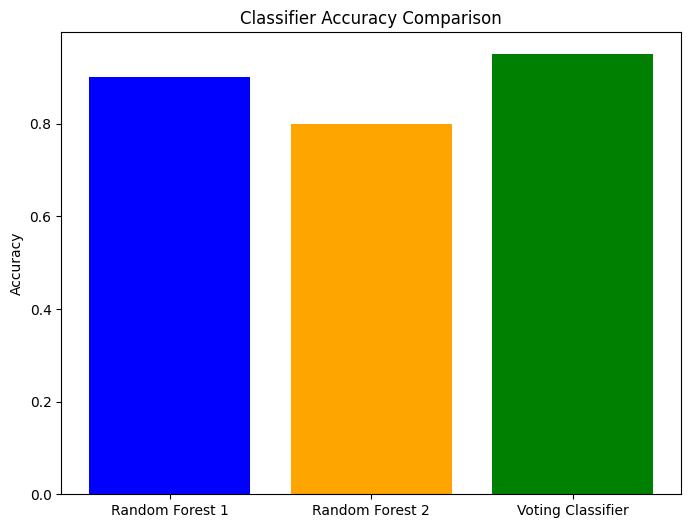

In [3]:

# 예시 코드 및 시각화 추가
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 생성
X, y = make_classification(n_samples=100, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분류기 생성
clf1 = RandomForestClassifier(n_estimators=10, random_state=42)
clf2 = RandomForestClassifier(n_estimators=20, random_state=42)

# 각 분류기 학습
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# 보팅 분류기
voting_clf = VotingClassifier(estimators=[('rf1', clf1), ('rf2', clf2)], voting='hard')
voting_clf.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_clf1 = clf1.predict(X_test)
y_pred_clf2 = clf2.predict(X_test)
y_pred_voting = voting_clf.predict(X_test)

accuracy_clf1 = accuracy_score(y_test, y_pred_clf1)
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
accuracy_voting = accuracy_score(y_test, y_pred_voting)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.bar(['Random Forest 1', 'Random Forest 2', 'Voting Classifier'], 
        [accuracy_clf1, accuracy_clf2, accuracy_voting],
        color=['blue', 'orange', 'green'])
plt.ylabel('Accuracy')
plt.title('Classifier Accuracy Comparison')
plt.show()


# 보팅 (Voting)
### 설명
- **하드 보팅 (Hard Voting)**: 다수결 원칙을 사용하여 최종 결과 도출.
- **소프트 보팅 (Soft Voting)**: 각 분류기의 레이블 결정 확률을 평균하여 최종 결과 도출.

---


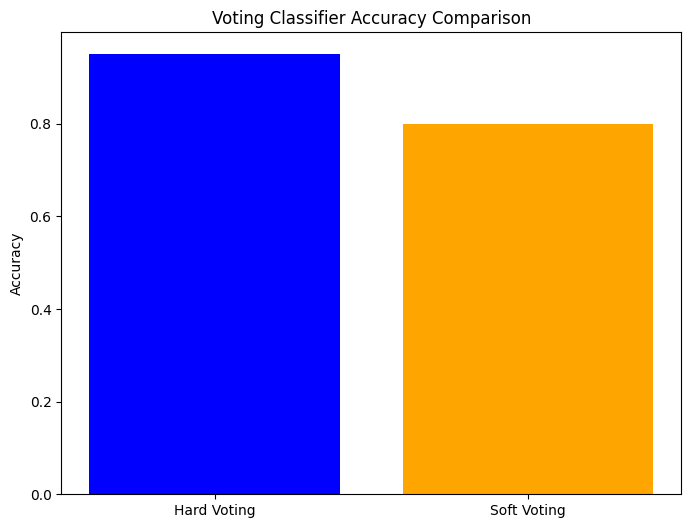

In [4]:

# 시각화 코드 추가
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 생성
X, y = make_classification(n_samples=100, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 분류기 생성
clf1 = RandomForestClassifier(n_estimators=10, random_state=42)
clf2 = RandomForestClassifier(n_estimators=20, random_state=42)

# 각 분류기 학습
clf1.fit(X_train, y_train)
clf2.fit(X_train, y_train)

# 보팅 분류기 (하드 보팅)
voting_clf_hard = VotingClassifier(estimators=[('rf1', clf1), ('rf2', clf2)], voting='hard')
voting_clf_hard.fit(X_train, y_train)

# 보팅 분류기 (소프트 보팅)
voting_clf_soft = VotingClassifier(estimators=[('rf1', clf1), ('rf2', clf2)], voting='soft')
voting_clf_soft.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_hard = voting_clf_hard.predict(X_test)
y_pred_soft = voting_clf_soft.predict(X_test)

accuracy_hard = accuracy_score(y_test, y_pred_hard)
accuracy_soft = accuracy_score(y_test, y_pred_soft)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.bar(['Hard Voting', 'Soft Voting'], [accuracy_hard, accuracy_soft], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Voting Classifier Accuracy Comparison')
plt.show()


# 랜덤 포레스트 (Random Forest)
### 설명
- 배깅 방식을 사용한 대표적인 앙상블 학습 알고리즘.
- 여러 개의 결정 트리 분류기가 배깅 방식으로 학습하고 보팅을 통해 예측 결정.

### 주요 특징
- 빠른 속도와 높은 예측 성능.
- 데이터 샘플링 시 부트스트랩 방식을 사용.

---


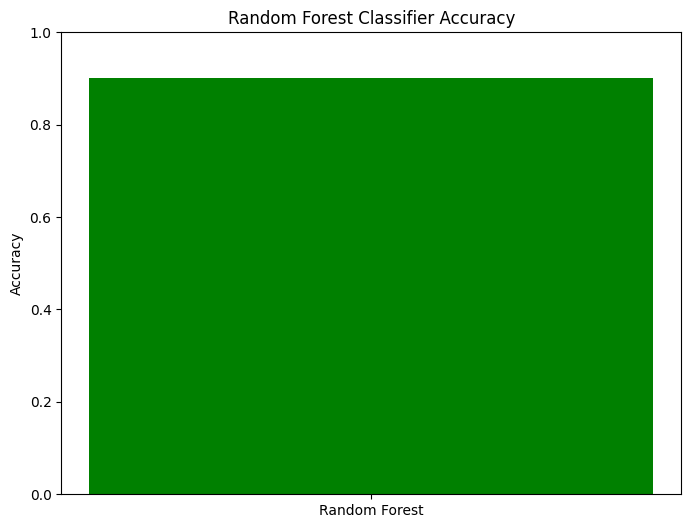

In [5]:

# 랜덤 포레스트 시각화 코드 추가
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 데이터 생성
X, y = make_classification(n_samples=100, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 분류기 생성 및 학습
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_rf = rf_clf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.bar(['Random Forest'], [accuracy_rf], color=['green'])
plt.ylabel('Accuracy')
plt.title('Random Forest Classifier Accuracy')
plt.ylim(0, 1)
plt.show()


# 부스팅 (Boosting)
### 설명
- 여러 개의 약한 학습기를 순차적으로 학습.
- 잘못 예측된 데이터에 가중치를 부여하여 오류를 개선.

### 주요 알고리즘
1. **AdaBoost**: 잘못된 예측에 가중치를 부여.
2. **GBM (Gradient Boosting Machine)**: 잔차를 최소화.
3. **XGBoost**: GBM의 단점을 보완.
4. **LightGBM**: 빠른 학습 속도와 적은 메모리 사용.

---


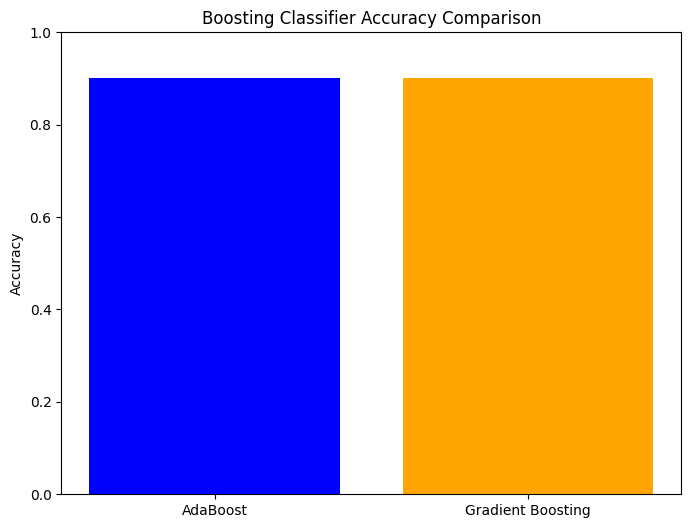

In [6]:
# 부스팅 시각화 코드 추가
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# 데이터 생성
X, y = make_classification(n_samples=100, n_features=20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# AdaBoost 분류기 생성 및 학습
ada_clf = AdaBoostClassifier(n_estimators=50, random_state=42)
ada_clf.fit(X_train, y_train)

# Gradient Boosting 분류기 생성 및 학습
gb_clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
gb_clf.fit(X_train, y_train)

# 예측 및 정확도 평가
y_pred_ada = ada_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)

accuracy_ada = accuracy_score(y_test, y_pred_ada)
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.bar(['AdaBoost', 'Gradient Boosting'], [accuracy_ada, accuracy_gb], color=['blue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Boosting Classifier Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


# 오버샘플링 및 언더샘플링
### 데이터 불균형 문제 해결 기법
- **언더샘플링 (Undersampling)**: 다수 클래스 데이터를 줄임.
- **오버샘플링 (Oversampling)**: 소수 클래스 데이터를 증식.

### SMOTE (Synthetic Minority Over-sampling Technique)
- 소수 클래스 데이터에서 임의로 하나를 선택하고, 가까운 데이터와의 직선 상에서 새로운 데이터를 생성.

---


원본 데이터 클래스 분포: Counter({0: 897, 1: 103})
오버샘플링 후 클래스 분포: Counter({0: 897, 1: 897})


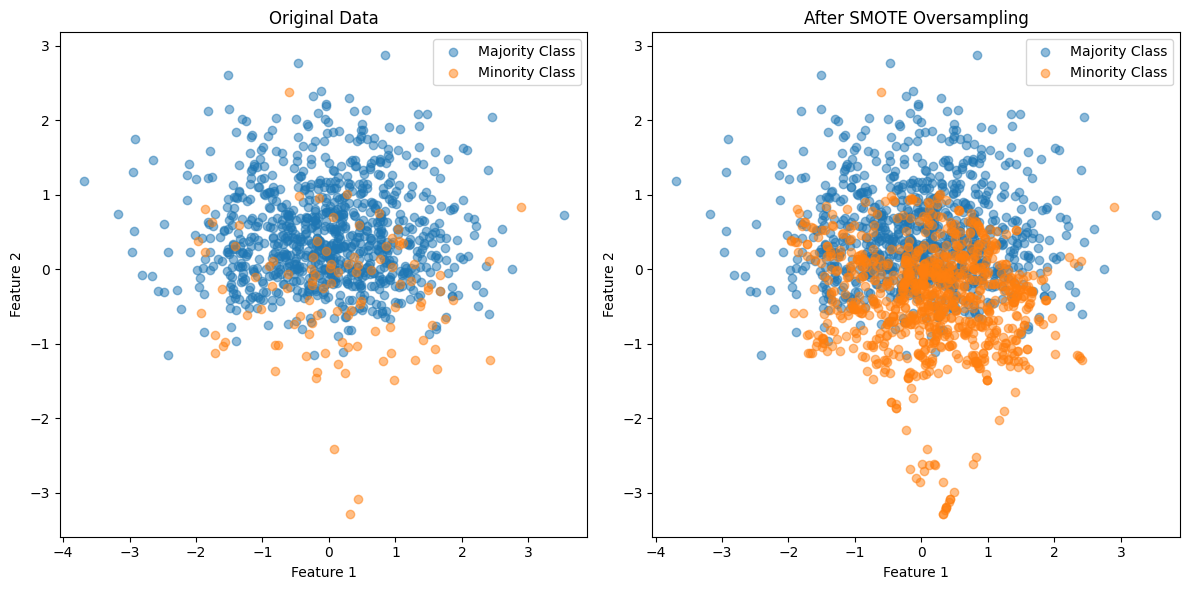

In [7]:

# 오버샘플링 및 언더샘플링 시각화 코드 추가
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

# 데이터 생성 (불균형 데이터)
X, y = make_classification(n_samples=1000, n_classes=2, weights=[0.9, 0.1], random_state=42)
print(f'원본 데이터 클래스 분포: {Counter(y)}')

# 오버샘플링 (SMOTE)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
print(f'오버샘플링 후 클래스 분포: {Counter(y_resampled)}')

# 시각화
plt.figure(figsize=(12, 6))

# 원본 데이터 시각화
plt.subplot(1, 2, 1)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label='Majority Class', alpha=0.5)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Minority Class', alpha=0.5)
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# 오버샘플링 후 데이터 시각화
plt.subplot(1, 2, 2)
plt.scatter(X_resampled[y_resampled == 0][:, 0], X_resampled[y_resampled == 0][:, 1], label='Majority Class', alpha=0.5)
plt.scatter(X_resampled[y_resampled == 1][:, 0], X_resampled[y_resampled == 1][:, 1], label='Minority Class', alpha=0.5)
plt.title('After SMOTE Oversampling')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.tight_layout()
plt.show()